In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
num_steps=6500 # To sweep to "-65" : one edge (from zero)
num_steps=6500*2 # To go from -65 to +65
num_steps=7000

x=np.arange(num_steps)

print(3000000/num_steps)
print(3000000/(6500*1))
print(3000000/(6500*2))

428.57142857142856
461.53846153846155
230.76923076923077


In [12]:
# Reasonable decreasing line (speeding up)
slope=-0.015
x0=255
y=x*slope+x0

In [13]:
# Reasonable decreasing line (speeding up)
slope=0
x0=255 #230.76
#y=x*slope+x0

In [79]:
desired_y=(49.4145 / 7000 * (x+1.0) ) # 49.4145: Total desired vertical mvmt (?)

In [80]:
desired_y[0:5],desired_y[-5:]

(array([0.00705921, 0.01411843, 0.02117764, 0.02823686, 0.03529607]),
 array([49.38626314, 49.39332236, 49.40038157, 49.40744079, 49.4145    ]))

In [81]:
# The measured movement follows this quadratic behavior. (Empirical, git to a quadratic)
# So, invert to find the time between steps (the xs) that yield equally spaced desired_y's
a=3.8687
b=4.8654
c=0.4721
desired_times=(-b+np.sqrt(b**2-4*a*(-desired_y)))/(2*a)
intervals=np.diff(desired_times)

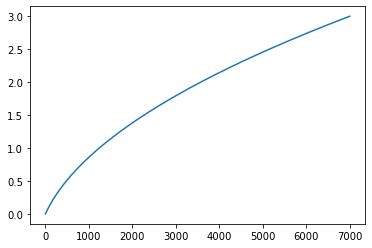

In [82]:
plt.plot(x,desired_times)

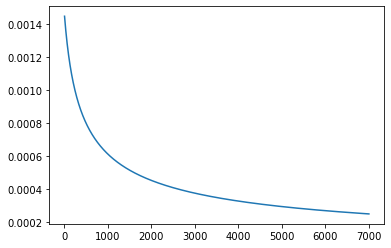

In [85]:
intervals[-5:]

array([0.0002515 , 0.00025148, 0.00025146, 0.00025144, 0.00025143])

In [262]:
intervals_usec = intervals * 1000000

In [263]:
#intervals_usec = intervals_usec * 0 + 250 # Testing constants

In [264]:
interval_min=np.round( np.min(intervals_usec) )
interval_max=np.max(intervals_usec)
scaler=((interval_max-interval_min)/254.0)
if scaler==0: scaler=1 # For constants

In [265]:
intervals_int8=np.round( (intervals_usec-interval_min)/scaler )
intervals_int8_recon = np.array(
    intervals_int8 * scaler_expanded/(2**expander_exponent) + interval_min, dtype=int)

In [267]:
interval_min,interval_max,scaler,intervals_int8

(251.0,
 1445.9063699917458,
 4.704355787369078,
 array([254., 253., 253., ...,   0.,   0.,   0.]))

In [214]:
np.sum(intervals_int8_recon)

2998515.457989729

In [206]:
expander_exponent=11
scaler_expanded=np.round( scaler*(2**expander_exponent) )

In [207]:
scaler_times2048

9631.080020096051

In [185]:
2**16-scaler_times2048*254

27312.6511702438

In [163]:
2**16 / 254

258.01574803149606

In [150]:
scaler*(2**11)

9631.080020096051

In [249]:
intervals_usec[0:63]

array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.])

In [219]:
intervals_int8[0:5],intervals_int8[-5:]

(array([254., 253., 253., 252., 251.]), array([0., 0., 0., 0., 0.]))

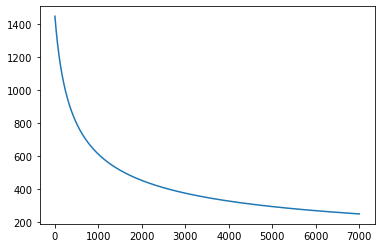

In [202]:
plt.plot(x[1:],intervals_usec)
#plt.plot(x[1:],intervals_int8_recon)


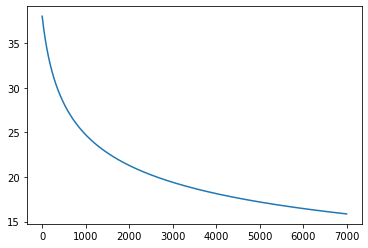

In [204]:
plt.plot(x[1:],intervals_usec**0.5)

24.71077965715 7000


/tmp/ipykernel_3500638/3661605142.py:5: RuntimeWarning: invalid value encountered in sqrt
  y2=(-b+np.sqrt(b**2-4*a*(desired_y)))/(2*a)


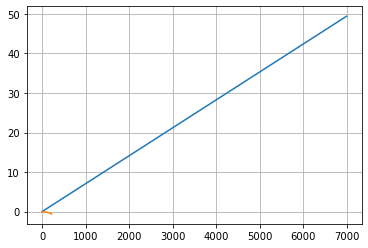

In [26]:



plt.plot(x,y)

plt.plot(x,y2)

plt.grid()
print ( np.mean(y), len(y))

y_round=np.round(y)

In [268]:
fil=open('lookup_table1.h','wt')
fil.writelines('const unsigned int table_scaler = %d;\n'%scaler_times2048);
fil.writelines('const unsigned int table_expander_exponent = %d;\n'%expander_exponent);
fil.writelines('const unsigned int table_interval_min = %d;\n'%interval_min);
fil.writelines('const PROGMEM uint8_t table1[] = {\n');
for nelement in intervals_int8:
    fil.writelines('%d,\n'%nelement)
fil.writelines('};\n');
fil.close()

In [269]:
len(y_round)

7000

In [270]:
700 * 0.25

175.0

In [271]:
np.min( intervals_int8 ), np.max( intervals_int8 )

(0.0, 254.0)